<a href="https://colab.research.google.com/github/nijoluca/MLProjects/blob/main/P1_project_emotion_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red" > From text to emotion prediction using </font>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('https://raw.githubusercontent.com/nijoluca/MLProjects/main/datasets/Emotion_classify_Data.csv')
#Reference for the projects https://www.kaggle.com/code/kirtanmatalia26/emotion-prediction-using-nlp

In [10]:
data['Emotion'].unique()

array(['fear', 'anger', 'joy'], dtype=object)

In [11]:
#tranform the emotion datasets using the LabelEncoder

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

y=LE.fit_transform(data['Emotion'])


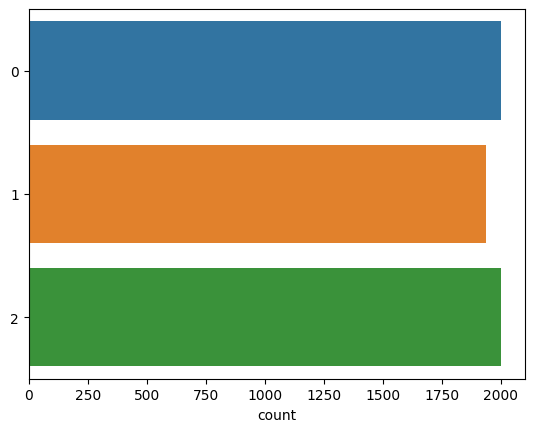

In [12]:
sns.countplot(data=data,y=y)
plt.show()

In [13]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

WNL=WordNetLemmatizer()

In [37]:
corpus=[]
for i in range(0,len(data)):
  review=re.sub(r'^A-Za-z','',data['Comment'][i])
  review=review.lower()
  review=review.split()

  review=[WNL.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
print(corpus)


['seriously hate one subject death feel reluctant drop', 'im full life feel appalled', 'sit write start dig feeling think afraid accept possibility might make', 'ive really angry r feel like idiot trusting first place', 'feel suspicious one outside like rapture happened something', 'feel jealous becasue wanted kind love true connection two soul wanted', 'friend mine keep telling morbid thing happened dog', 'finally fell asleep feeling angry useless still full anxiety', 'feel bit annoyed antsy good way', 'feel like regained another vital part life living', 'feel bit like franz liebkind producer many people know fuhrer terrific dancer', 'feeling start didnt want move much really glad experience glimpse sort vibrant energy gain year', 'bitten dog', 'always find feeling thankful year gathered trick allow feel grateful face moment last thing want say thanks', 'try talk anyone feel irritable like', 'feel like hated since', 'dont know wrote following little note feel today u r offended follow

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

CV=CountVectorizer()
x=CV.fit_transform(corpus).toarray()
x.shape

(5937, 7972)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

y_pred=RFC.predict(x_test)


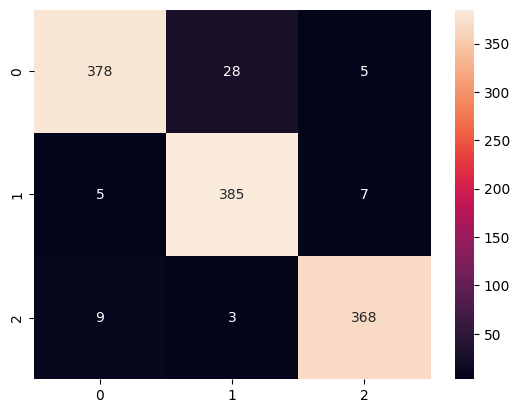

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.3g')
plt.show()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000
